<a href="https://colab.research.google.com/github/banidprajapati/Stroke-data/blob/main/BanidPrajapati_2329221.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [ ]:
data = pd.read_csv("healthcare-dataset-stroke-data.csv")

### Inspecting the Data

In [ ]:
print(f"Total data size: {data.size}")

Total data size: 61320


In [ ]:
print(data.shape)
print(f"Rows: {data.shape[0]}")
print(f"Column: {data.shape[1]}")

(5110, 12)
Rows: 5110
Column: 12


In [ ]:
print(data.columns)

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')


In [ ]:
data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [ ]:
data.tail()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0
5109,44679,Female,44.0,0,0,Yes,Govt_job,Urban,85.28,26.2,Unknown,0


### Data Types and Basic Fitness

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [ ]:
data.dtypes

id                     int64
gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

In [ ]:
data = data[data['gender'] != 'Other']
print("Gender Distribution")
gender_counts = data.gender.value_counts()
print(gender_counts)

Gender Distribution
Female    2994
Male      2115
Name: gender, dtype: int64


In [ ]:
print("Stroke Distribution in Patients")
stroke_counts = data['stroke'].replace({0: 'Patients with no stroke', 1: 'Patients with stroke'}).value_counts()
print(stroke_counts)

Stroke Distribution in Patients
Patients with no stroke    4860
Patients with stroke        249
Name: stroke, dtype: int64


In [ ]:
print("Heart Disease Distribution in Patients")
heart_disease_counts = data['heart_disease'].replace({0: 'Patients with no heart condition', 1: 'Patients with heart condition'}).value_counts()
print(heart_disease_counts)

Heart Disease Distribution in Patients
Patients with no heart condition    4833
Patients with heart condition        276
Name: heart_disease, dtype: int64


In [ ]:
print("Hypertension Distribution in Patients")
hypertension_counts = data['hypertension'].replace({0: 'Patients with no hypertension', 1: 'Patients with hypertension'}).value_counts()
print(hypertension_counts)

Hypertension Distribution in Patients
Patients with no hypertension    4611
Patients with hypertension        498
Name: hypertension, dtype: int64


### Data Cleaning

In [ ]:
data.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [ ]:
data = data.dropna()

In [ ]:
data.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [ ]:
data.duplicated()

0       False
2       False
3       False
4       False
5       False
        ...  
5104    False
5106    False
5107    False
5108    False
5109    False
Length: 4908, dtype: bool

In [ ]:
if data.duplicated().any():
    data.drop_duplicates(inplace=True)

In [ ]:
data.duplicated()

0       False
2       False
3       False
4       False
5       False
        ...  
5104    False
5106    False
5107    False
5108    False
5109    False
Length: 4908, dtype: bool

In [ ]:
data = data[data['gender'] != 'Other']

gender_counts = data.gender.value_counts()
print(gender_counts)

Female    2897
Male      2011
Name: gender, dtype: int64


In [ ]:
print(data[data['age'] < 2])

         id  gender   age  hypertension  heart_disease ever_married work_type  \
363    7559  Female  0.64             0              0           No  children   
376   22706  Female  0.88             0              0           No  children   
562   45238  Female  1.80             0              0           No  children   
564   61511  Female  0.32             0              0           No  children   
597   40639  Female  1.08             0              0           No  children   
...     ...     ...   ...           ...            ...          ...       ...   
4929  29487    Male  0.72             0              0           No  children   
5032  67426  Female  1.24             0              0           No  children   
5079  42709    Male  1.72             0              0           No  children   
5089  56714  Female  0.72             0              0           No  children   
5095  68598    Male  1.08             0              0           No  children   

     Residence_type  avg_gl

In [ ]:
data['age'] = data['age'].astype(int)

In [ ]:
print(data[data['age'] < 2])

         id  gender  age  hypertension  heart_disease ever_married work_type  \
363    7559  Female    0             0              0           No  children   
376   22706  Female    0             0              0           No  children   
562   45238  Female    1             0              0           No  children   
564   61511  Female    0             0              0           No  children   
597   40639  Female    1             0              0           No  children   
...     ...     ...  ...           ...            ...          ...       ...   
4929  29487    Male    0             0              0           No  children   
5032  67426  Female    1             0              0           No  children   
5079  42709    Male    1             0              0           No  children   
5089  56714  Female    0             0              0           No  children   
5095  68598    Male    1             0              0           No  children   

     Residence_type  avg_glucose_level 

### Better Understanding the Data

### Summary Statistics

In [ ]:
numeric_column = data.select_dtypes(include=[np.number])
numeric_column

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
0,9046,67,0,1,228.69,36.6,1
2,31112,80,0,1,105.92,32.5,1
3,60182,49,0,0,171.23,34.4,1
4,1665,79,1,0,174.12,24.0,1
5,56669,81,0,0,186.21,29.0,1
...,...,...,...,...,...,...,...
5104,14180,13,0,0,103.08,18.6,0
5106,44873,81,0,0,125.20,40.0,0
5107,19723,35,0,0,82.99,30.6,0
5108,37544,51,0,0,166.29,25.6,0


In [ ]:
numeric_column.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
id,4909.0,37064.313506,20995.098457,77.00,18605.00,37608.00,55220.00,72940.00
age,4909.0,42.865374,22.555115,0.08,25.00,44.00,60.00,82.00
hypertension,4909.0,0.091872,0.288875,0.00,0.00,0.00,0.00,1.00
heart_disease,4909.0,0.049501,0.216934,0.00,0.00,0.00,0.00,1.00
avg_glucose_level,4909.0,105.305150,44.424341,55.12,77.07,91.68,113.57,271.74
bmi,4909.0,28.893237,7.854067,10.30,23.50,28.10,33.10,97.60
stroke,4909.0,0.042575,0.201917,0.00,0.00,0.00,0.00,1.00


In [ ]:
categorical_column = data.select_dtypes(exclude=[np.number])
categorical_column

,gender,ever_married,work_type,Residence_type,smoking_status
0,Male,Yes,Private,Urban,formerly smoked
2,Male,Yes,Private,Rural,never smoked
3,Female,Yes,Private,Urban,smokes
4,Female,Yes,Self-employed,Rural,never smoked
5,Male,Yes,Private,Urban,formerly smoked
...,...,...,...,...,...
5104,Female,No,children,Rural,Unknown
5106,Female,Yes,Self-employed,Urban,never smoked
5107,Female,Yes,Self-employed,Rural,never smoked
5108,Male,Yes,Private,Rural,formerly smoked


In [ ]:
categorical_column.describe().transpose()

,count,unique,top,freq
gender,4909,3,Female,2897
ever_married,4909,2,Yes,3204
work_type,4909,5,Private,2811
Residence_type,4909,2,Urban,2490
smoking_status,4909,4,never smoked,1852


In [ ]:
for col in categorical_column:
    print(f"\nUnique values in '{col}':")
    print(data[col].unique())


Unique values in 'gender':
['Male' 'Female' 'Other']

Unique values in 'ever_married':
['Yes' 'No']

Unique values in 'work_type':
['Private' 'Self-employed' 'Govt_job' 'children' 'Never_worked']

Unique values in 'Residence_type':
['Urban' 'Rural']

Unique values in 'smoking_status':
['formerly smoked' 'never smoked' 'smokes' 'Unknown']


### Graphical Representation

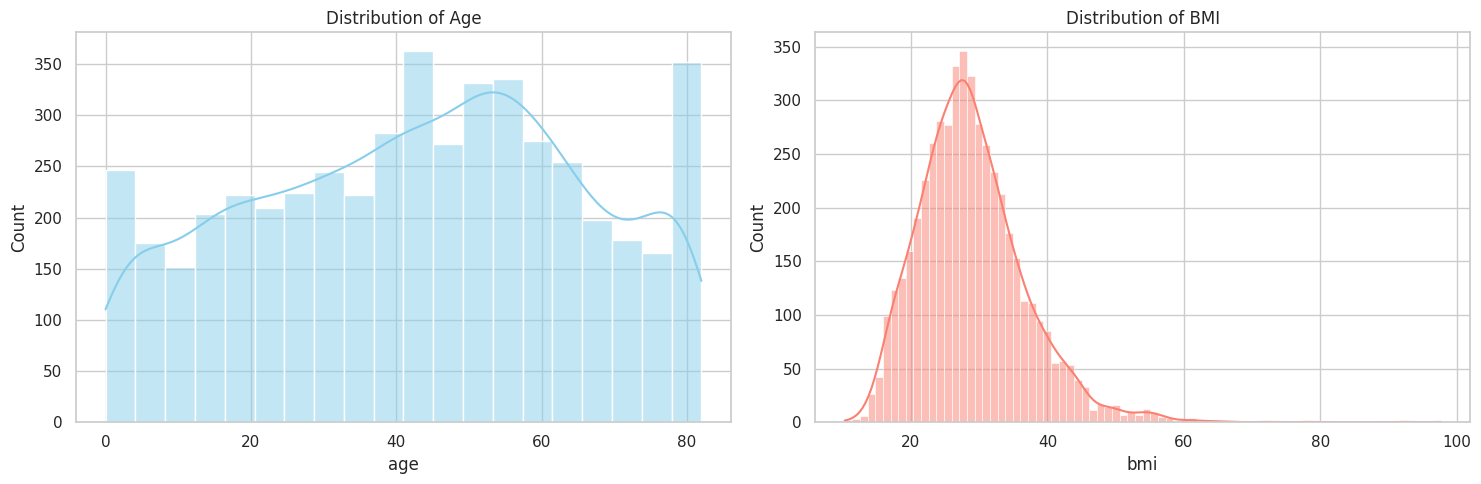

In [ ]:
# Set the style for Seaborn plots
sns.set(style="whitegrid")

# Create a figure with subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

# Plot Age distribution
sns.histplot(data=data, x='age', kde=True, ax=axes[0], color='skyblue')
axes[0].set_title('Distribution of Age')

# Plot BMI distribution
sns.histplot(data=data, x='bmi', kde=True, ax=axes[1], color='salmon')
axes[1].set_title('Distribution of BMI')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


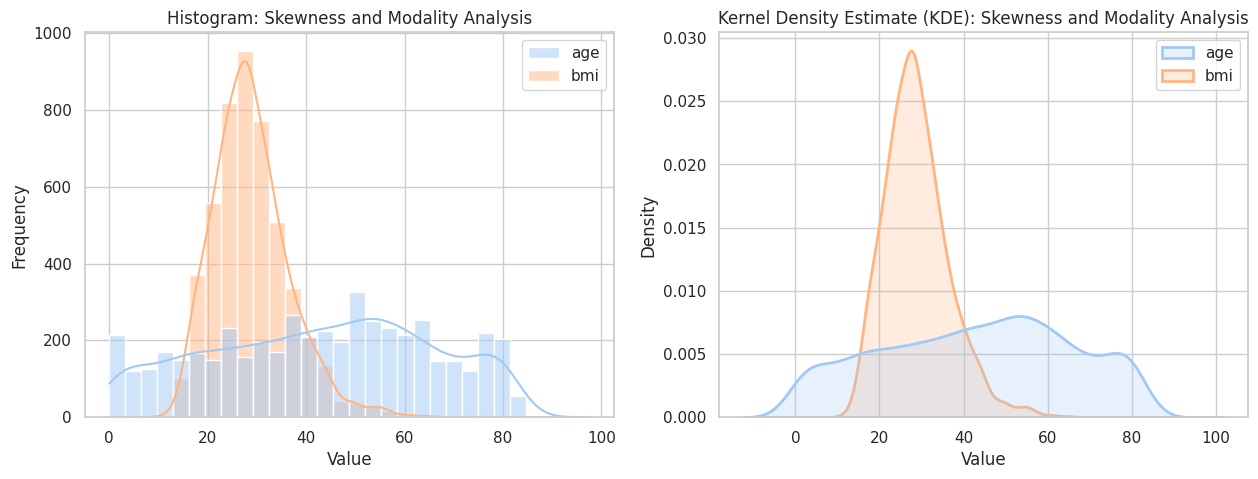

In [ ]:
#Skewness and Modality Analysis

#Setting the size of the figure for subplots
plt.figure(figsize=(15, 5))

#Creating subplot for the histogram
plt.subplot(1, 2, 1)
sns.histplot(data=data[['age', 'bmi']], kde=True, bins=30, palette='pastel')
plt.title('Histogram: Skewness and Modality Analysis')
plt.xlabel('Value')
plt.ylabel('Frequency')

#Creating subplot for the KDE line plot
plt.subplot(1, 2, 2)
sns.kdeplot(data=data[['age', 'bmi']], fill=True, palette='pastel', linewidth=2)
plt.title('Kernel Density Estimate (KDE): Skewness and Modality Analysis')
plt.xlabel('Value')
plt.ylabel('Density')

#Displaying the subplots
plt.show()


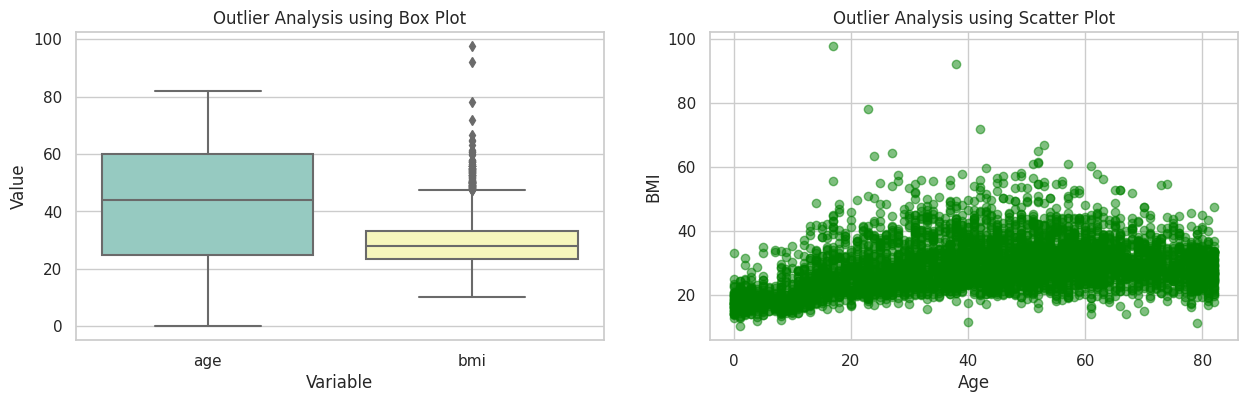

In [ ]:
#Outliers Analysis

#Setting up a 1x2 grid for subplots
fig, axes = plt.subplots(1, 2, figsize=(15, 4))

#Box Plot: Outlier Analysis (between age and bmi)
plt.subplot(1,2,1)
sns.boxplot(data=data[['age', 'bmi']], palette='Set3', ax=axes[0])
plt.title('Outlier Analysis using Box Plot')
plt.xlabel('Variable')
plt.ylabel('Value')

#Scatter Plot: Outlier Analysis (between age and bmi)
plt.subplot(1,2,2)
plt.scatter(data['age'], data['bmi'], color='green', alpha=0.5)
plt.title('Outlier Analysis using Scatter Plot')
plt.xlabel('Age')
plt.ylabel('BMI')

#Displaying the subplots
plt.show()

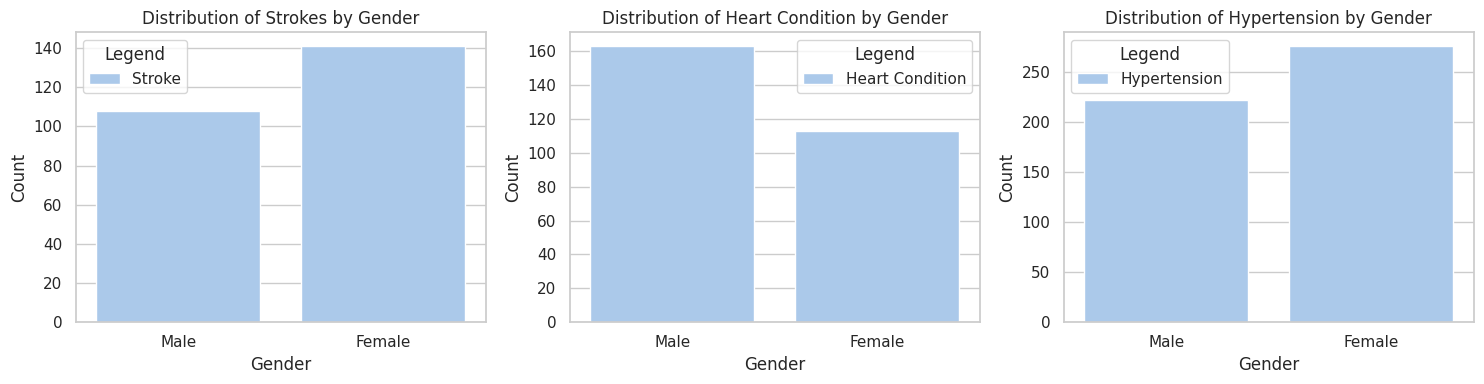

In [ ]:
# Filter data for each condition
stroke_data = data[data['stroke'] == 1]
heart_disease_data = data[data['heart_disease'] == 1]
hypertension_data = data[data['hypertension'] == 1]

# Plotting
plt.figure(figsize=(15, 4))

# First plot
plt.subplot(1, 3, 1)
sns.countplot(x='gender', hue='stroke', data=stroke_data, palette='pastel', order=['Male', 'Female'])
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Distribution of Strokes by Gender')
plt.legend(title='Legend', labels=['Stroke'])

# Second Plot
plt.subplot(1, 3, 2)
sns.countplot(x='gender', hue='heart_disease', data=heart_disease_data, palette='pastel', order=['Male', 'Female'])
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Distribution of Heart Condition by Gender')
plt.legend(title='Legend', labels=['Heart Condition'])

# Third Plot
plt.subplot(1, 3, 3)
sns.countplot(x='gender', hue='hypertension', data=hypertension_data, palette='pastel', order=['Male', 'Female'])
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Distribution of Hypertension by Gender')
plt.legend(title='Legend', labels=['Hypertension'])

plt.tight_layout()
plt.show()


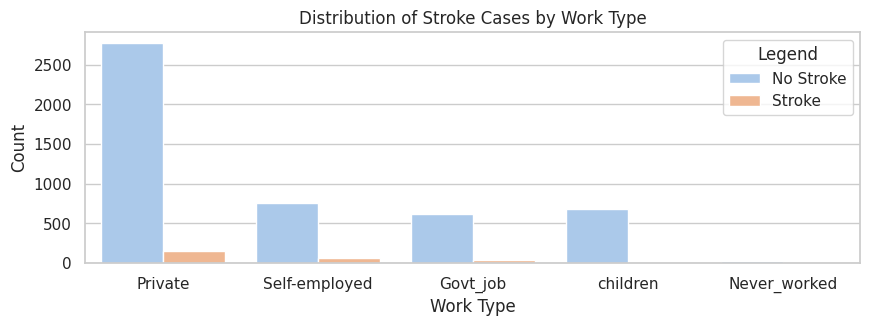

In [ ]:
# Plotting
plt.figure(figsize=(10, 3))
sns.countplot(x='work_type', hue='stroke', data=data, palette='pastel')
plt.xlabel('Work Type')
plt.ylabel('Count')
plt.title('Distribution of Stroke Cases by Work Type')
plt.legend(title='Legend', labels=['No Stroke', 'Stroke'])
plt.show()


In [ ]:
# Calculate count of stroke cases for each smoking status
stroke_by_smoking = data[data['stroke'] == 1].groupby('smoking_status').size()

# Calculate total count of stroke cases
total_stroke_cases = stroke_by_smoking.sum()

# Calculate the ratio for each smoking status
ratio_by_smoking = stroke_by_smoking / total_stroke_cases

# Display the results
print("Ratio of Distribution of Stroke Cases by Smoking Status:")
print(ratio_by_smoking)


Ratio of Distribution of Stroke Cases by Smoking Status:
smoking_status
Unknown            0.188755
formerly smoked    0.281124
never smoked       0.361446
smokes             0.168675
dtype: float64


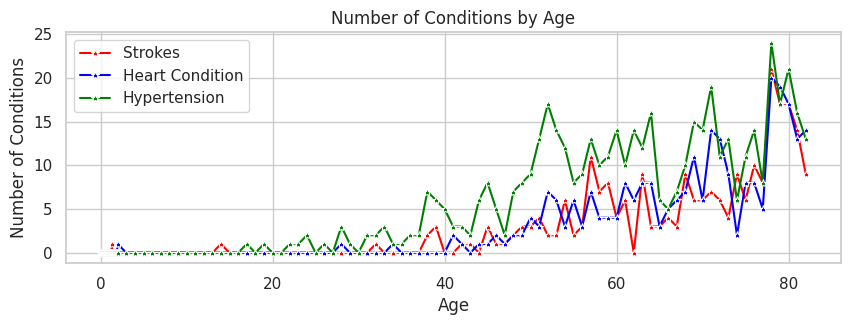

In [ ]:
age_condition_sum = data.groupby('age')[['stroke', 'heart_disease', 'hypertension']].sum().reset_index()

# Create a line plot
plt.figure(figsize=(10, 3))

sns.lineplot(x='age', y='stroke', data=age_condition_sum, marker='*', label='Strokes', color='red')
sns.lineplot(x='age', y='heart_disease', data=age_condition_sum, marker='*', label='Heart Condition', color='blue')
sns.lineplot(x='age', y='hypertension', data=age_condition_sum, marker='*', label='Hypertension', color='green')

plt.xlabel('Age')
plt.ylabel('Number of Conditions')
plt.title('Number of Conditions by Age')
plt.legend()
plt.show()

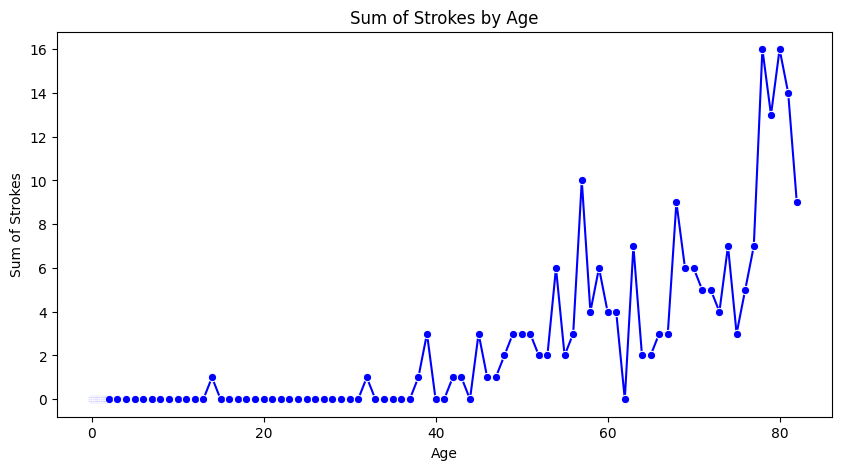

In [ ]:
age_stroke_sum = data.groupby('age')['stroke'].sum().reset_index()

# Create a line plot
plt.figure(figsize=(10, 5))
sns.lineplot(x='age', y='stroke', data=age_stroke_sum, marker='o', color='blue')
plt.xlabel('Age')
plt.ylabel('Number of Strokes')
plt.title('Number of Strokes by Age')
plt.show()

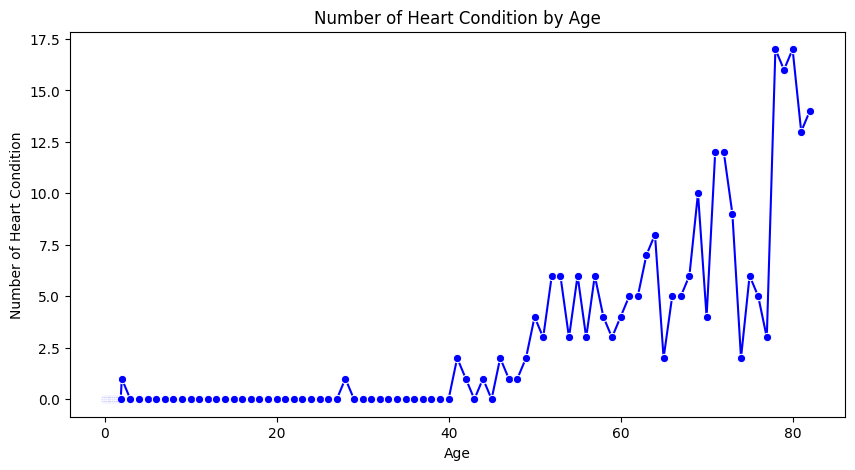

In [ ]:
age_stroke_sum = data.groupby('age')['heart_disease'].sum().reset_index()

# Create a line plot
plt.figure(figsize=(10, 5))
sns.lineplot(x='age', y='heart_disease', data=age_stroke_sum, marker='o', color='blue')
plt.xlabel('Age')
plt.ylabel('Number of Heart Condition')
plt.title('Number of Heart Condition by Age')
plt.show()

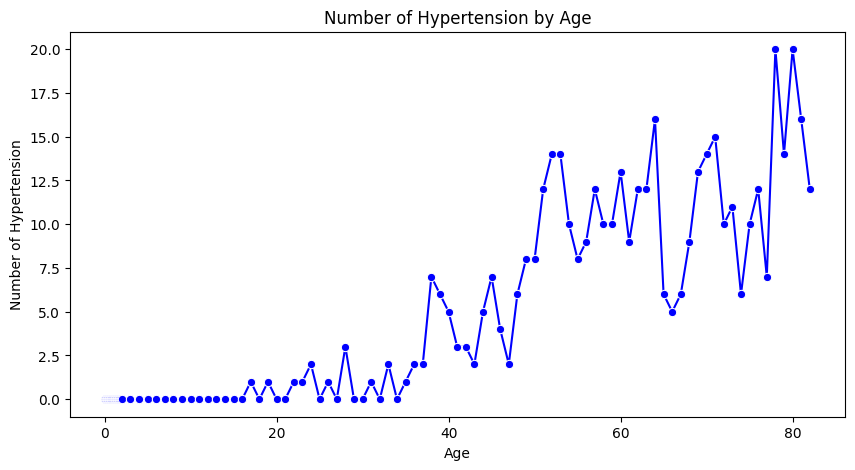

In [ ]:
age_stroke_sum = data.groupby('age')['hypertension'].sum().reset_index()

# Create a line plot
plt.figure(figsize=(10, 5))
sns.lineplot(x='age', y='hypertension', data=age_stroke_sum, marker='o', color='blue')
plt.xlabel('Age')
plt.ylabel('Number of Hypertension')
plt.title('Number of Hypertension by Age')
plt.show()

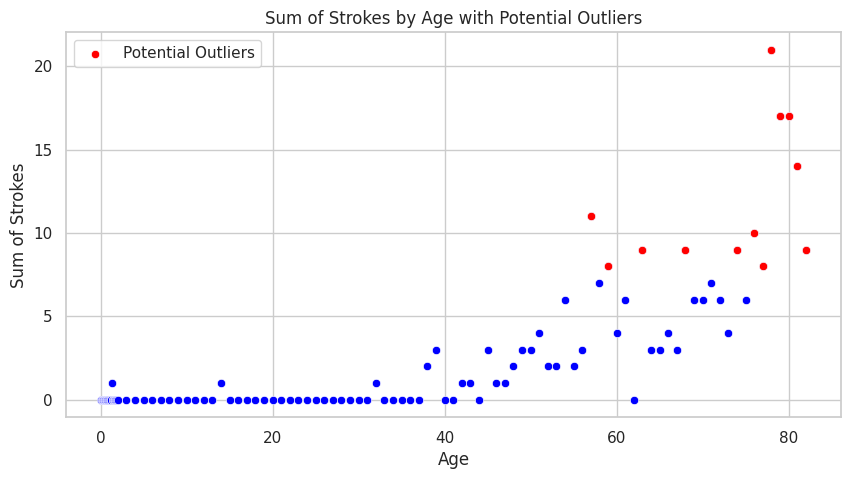

In [ ]:
age_stroke_sum = data.groupby('age')['stroke'].sum().reset_index()

# Calculate the IQR for 'stroke' values
Q1 = age_stroke_sum['stroke'].quantile(0.25)
Q3 = age_stroke_sum['stroke'].quantile(0.75)
IQR = Q3 - Q1

# Identify potential outliers
outliers = age_stroke_sum[(age_stroke_sum['stroke'] < (Q1 - 1.5 * IQR)) | (age_stroke_sum['stroke'] > (Q3 + 1.5 * IQR))]

# Create a scatter plot with potential outliers highlighted
plt.figure(figsize=(10, 5))
sns.scatterplot(x='age', y='stroke', data=age_stroke_sum, marker='o', color='blue')
sns.scatterplot(x='age', y='stroke', data=outliers, marker='o', color='red', label='Potential Outliers')
plt.xlabel('Age')
plt.ylabel('Sum of Strokes')
plt.title('Sum of Strokes by Age with Potential Outliers')
plt.legend()
plt.show()

<Figure size 800x300 with 0 Axes>

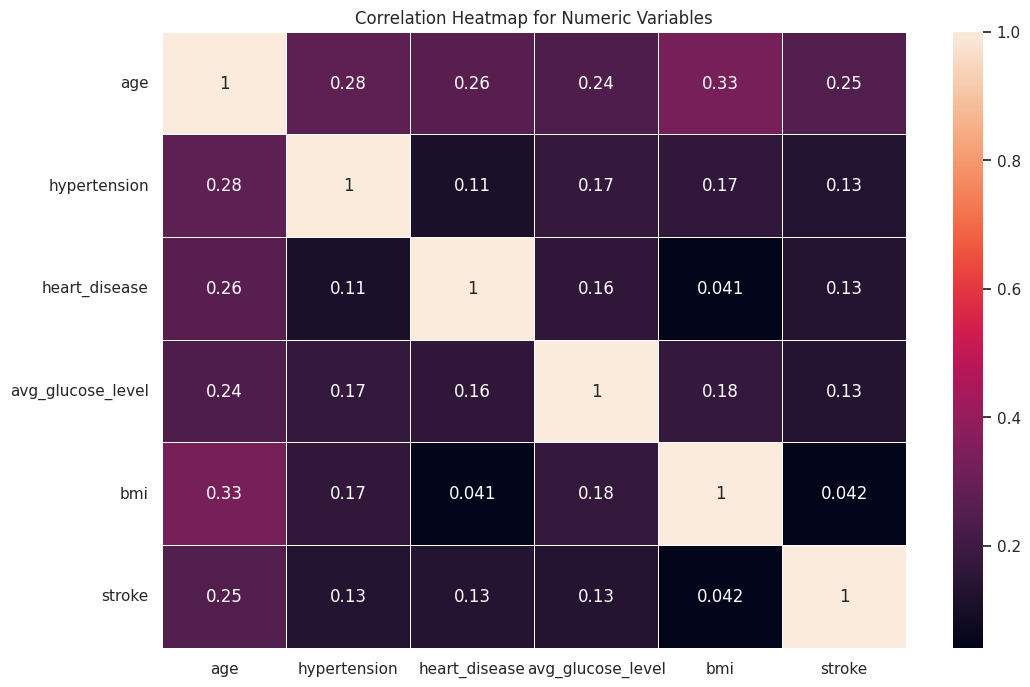

In [ ]:
numeric_columns = data.select_dtypes(include=[np.number]).drop(columns=['id'])

# Calculate the correlation matrix
plt.figure(figsize=(8, 3))
correlation_matrix = numeric_columns.corr()

# Create a heatmap for exploring correlations
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, linewidths=.5)
plt.title("Correlation Heatmap for Numeric Variables")
plt.show()

<Figure size 1500x300 with 0 Axes>

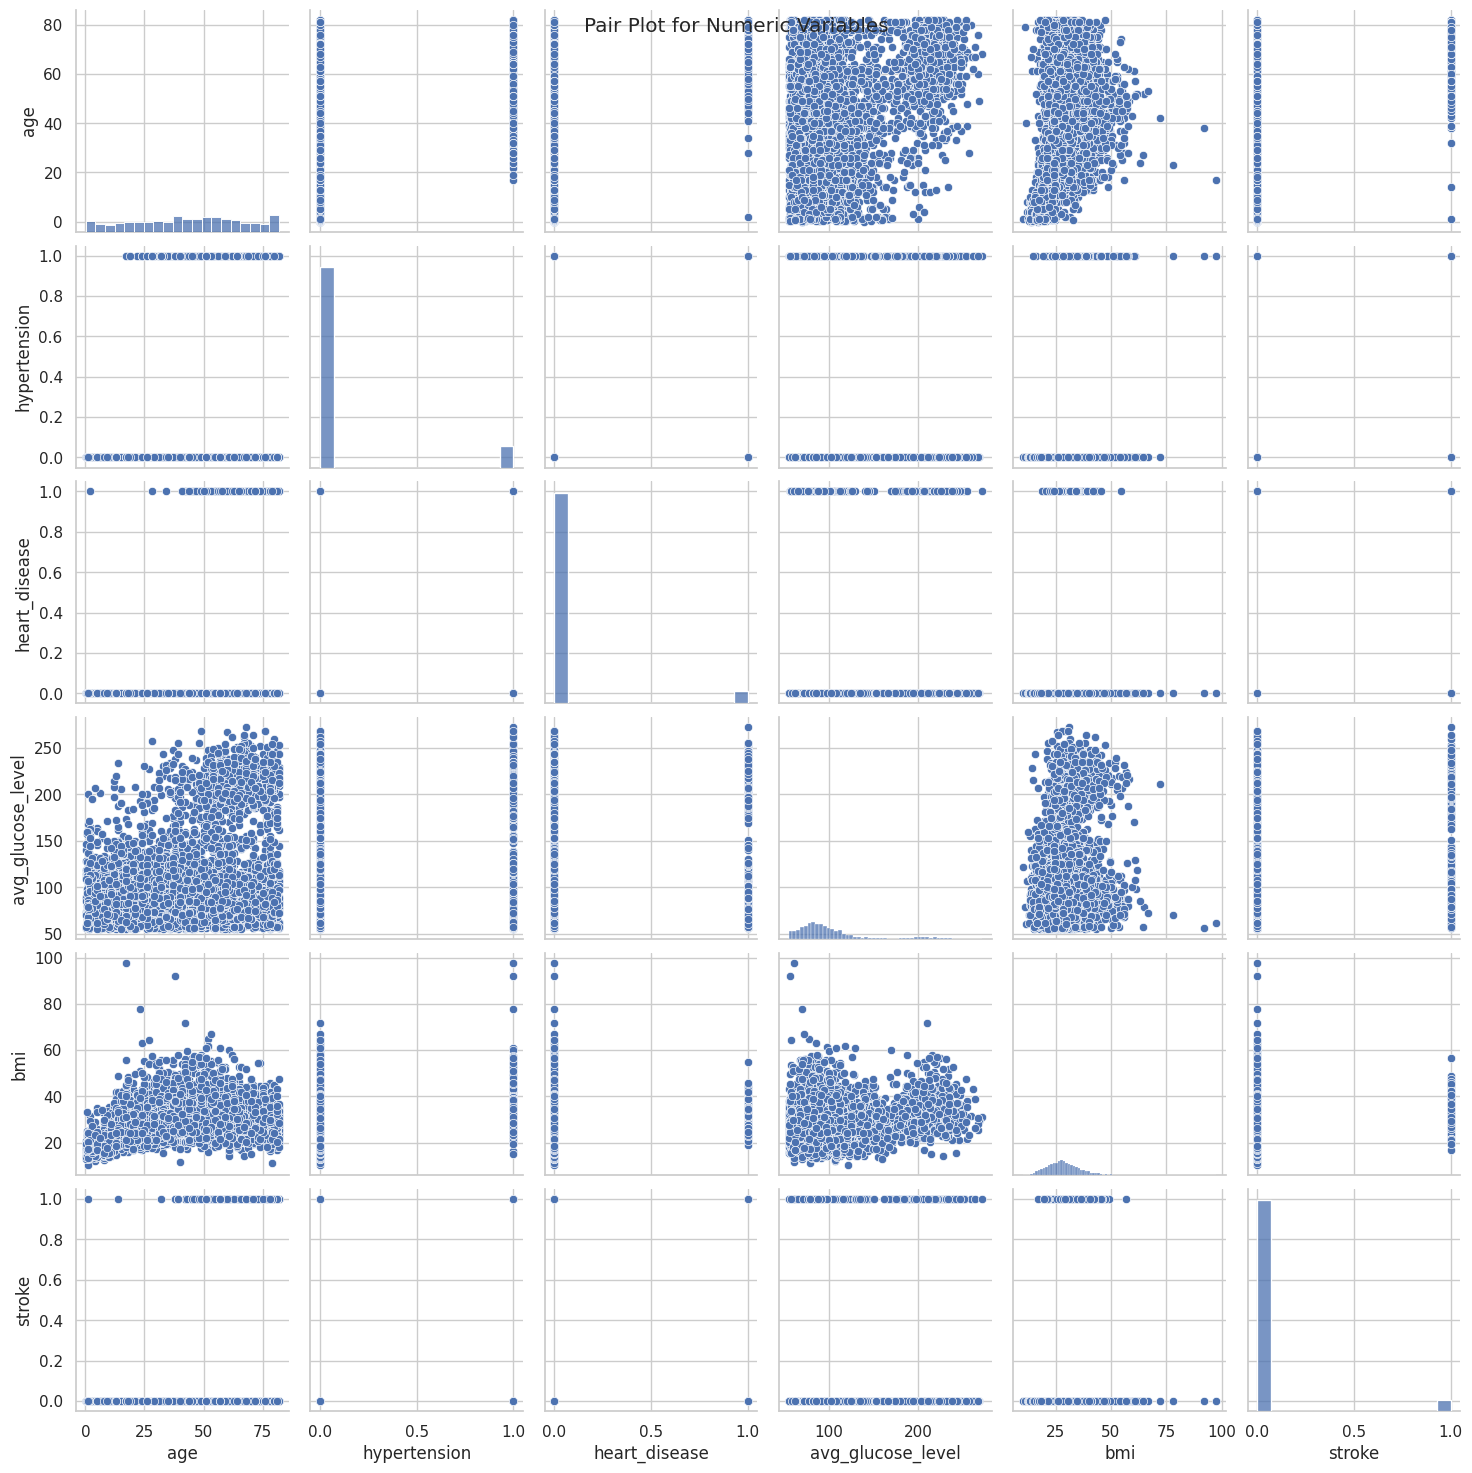

In [ ]:
#Selecting numeric columns for pair plot, excluding id
numeric_columns = data.select_dtypes(include=[np.number]).drop(columns=['id'])

#Creating a pair plot for exploring correlations
plt.figure(figsize=(15, 3))
sns.pairplot(numeric_columns)

#Setting the overall title for the pair plot
plt.suptitle("Pair Plot for Numeric Variables")

#Displaying the pair plot
plt.show()